In [1]:
from matplotlib import pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import SGD
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('mnist_train.csv')
df_test=pd.read_csv('mnist_test.csv')

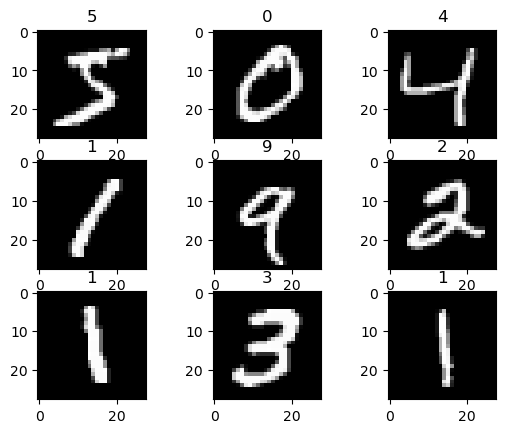

In [3]:
# Extract first 9 rows from training data and display them as image and their label as subplot title
for i in range(9):
 # define subplot
    plt.subplot(330 + 1 + i)
    
    row = df.iloc[i,1:]
    # Reshape the row to a 28x28 array
    reshaped_array = np.array(row).reshape(28, 28)
    # plot raw pixel data
    plt.imshow(reshaped_array, cmap=plt.get_cmap('gray'))
    plt.title(df.iloc[i,0])
# show the figure
plt.show()

# Print the reshaped array
#print(reshaped_array.shape)

In [4]:
df.shape

(60000, 785)

In [5]:
#Read train data from CSV file and reshape them into tensors of required shape
train_data=np.array(df.iloc[0:,1:])
train_data=train_data.reshape((train_data.shape[0], 28, 28, 1))
print(train_data.shape)
train_label=np.array(df.iloc[0:,0]).reshape(df.shape[0],1)
#train_label=df.iloc[0:,0]
 # one hot encode target values
train_label = to_categorical(train_label)
print(train_label.shape)
print(train_label[2])

(60000, 28, 28, 1)
(60000, 10)
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [6]:
#Read test data from CSV file and reshape them into tensors of required shape
test_data=np.array(df_test.iloc[0:,1:])
test_data=test_data.reshape((test_data.shape[0], 28, 28, 1))
print(test_data.shape)
test_label=np.array(df_test.iloc[0:,0]).reshape(df_test.shape[0],1)
# one hot encode target values
test_label = to_categorical(test_label)
print(test_label.shape)

(10000, 28, 28, 1)
(10000, 10)


In [7]:
# convert data from integers to floats
train_norm = train_data.astype('float32')
test_norm = test_data.astype('float32')
# normalize to range 0-1
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0

In [8]:
# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dense(10, activation='softmax'))
 # compile model
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [9]:
# Training and evaluation of model with cross validation
def evaluate_model(trainX, trainY,testX,testY):
    scores, histories = list(), list()

    # define model
    model = define_model()
    # select rows for train and test
    #print(trainX.shape)
    #print(trainY.shape)
    #print(testX.shape)
    #print(testY.shape)
        
        
    # fit model
    history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
    # evaluate model
    _, scores = model.evaluate(testX, testY, verbose=0)
    print('accuracy score on test dataset: > %.3f' % ( scores* 100.0))
    histories.append(history)
    # save model
    model.save('trained_model.keras')
    return scores, histories

In [10]:
# plot diagnostic learning curves
def summarize_diagnostics(histories):
    for i in range(len(histories)):
     # plot loss
        plt.subplot(2, 1, 1)
        plt.title('Cross Entropy Loss')
        plt.plot(histories[i].history['loss'], color='blue', label='train')
        plt.plot(histories[i].history['val_loss'], color='orange', label='test')
        plt.legend()
         # plot accuracy
        plt.subplot(2, 1, 2)
        plt.title('Classification Accuracy')
        plt.plot(histories[i].history['accuracy'], color='blue', label='train')
        plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
        plt.legend()
        plt.show()

C:\Users\HF\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


accuracy score on test dataset: > 98.860


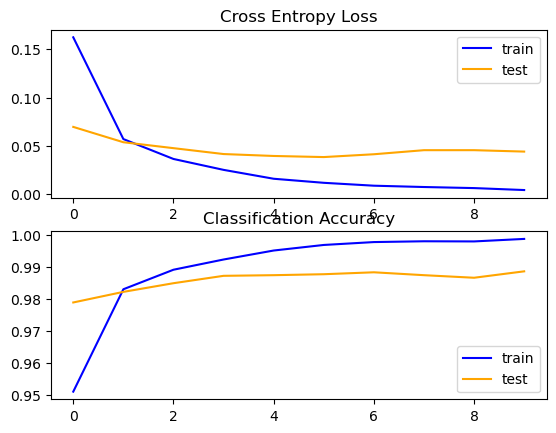

In [11]:
# evaluate model
scores, histories = evaluate_model(train_norm, train_label, test_norm, test_label)
# learning curves
summarize_diagnostics(histories)

Enter an integer between 0 and 9999: 56
(1, 28, 28, 1)


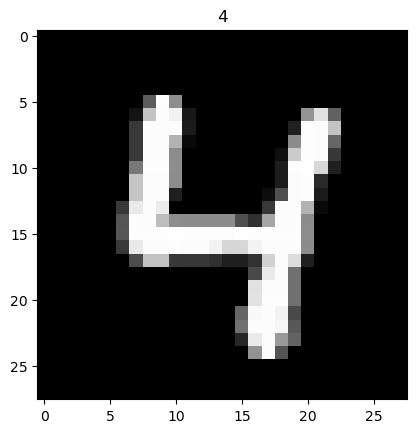

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
true label of the image is:  4
predicted label of the image is:  4


In [12]:
from numpy import argmax
from keras.models import load_model

#Image Class Prediction system from test data
#You have to select any number out of 10000 test examples to predict its label 
while True:
    try:
        user_input = int(input("Enter an integer between 0 and 9999: "))
        if 0 <= user_input <= 9999:
            break
        else:
            print("Please enter a number between 0 and 9999.")
    except ValueError:
        print("Please enter a valid integer.")
   
img = df_test.iloc[user_input,1:]
true_label=df_test.iloc[user_input,0]
#Read preprocessed image
img_norm=test_norm[user_input].reshape(1, 28, 28, 1)
print(img_norm.shape)
# Reshape the required data to a 28x28 array to display it as image
gray_image = np.array(img).reshape(28, 28)
# plot raw pixel data
plt.imshow(gray_image, cmap=plt.get_cmap('gray'))
plt.title(true_label)
# show the figure
plt.show()

# load model
model = load_model('trained_model.keras')
# predict the class
predict_value = model.predict(img_norm)
predicted_label = argmax(predict_value)
print('true label of the image is: ', true_label)
print('predicted label of the image is: ', predicted_label)
